<a href="https://colab.research.google.com/github/HarikaDevi23/DATA_SCIENCE/blob/main/Assignment1_Question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principles of Data Science

Name : Harika Devi Alla

ID : 16358867

Assignment 1

Question 1: Reproducible Workflow for Frailty Data


Stage I – Data Collection:

• Collect raw data (here, the table of 10 female participants) and save it in a CSV file (e.g., data/raw/frailty_data.csv).

• Save metadata (e.g., explanation of units and coding) alongside the raw file.

Stage II – Data Processing/Cleaning:

• Read in the raw CSV file and perform cleaning steps (e.g., converting categorical values, checking for missing values).

• Save the cleaned data in a separate folder (e.g., data/processed/frailty_data_clean.csv).

Stage III – Data Analysis:

• Analyze the cleaned data (e.g., compute descriptive statistics, correlations, or simple visualizations such as grouping grip strength by frailty).

• Save analysis outputs and figures in an analysis folder (e.g., results/frailty_analysis/).

Folder Structure

A suggested folder layout for the “Frailty_Project” might be:

Frailty_Project/

├── data/

│   ├── raw/

│   │   └── frailty_raw.csv

│   └── processed/

│       └── frailty_processed.csv

├── src/

│   ├── data_collection.py

│   ├── data_processing.py

│   └── analysis.py

├── results/

│   └── analysis_results.txt




In [51]:
# Stage I: Data Collection
# Create a DataFrame with the frailty data and save as CSV

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary for the data from the table
data = {
    "Height": [65.8, 71.5, 69.4, 68.2, 67.8, 68.7, 69.8, 70.1, 67.9, 66.8],
    "Weight": [112, 136, 153, 142, 144, 123, 141, 136, 112, 120],
    "Age": [30, 19, 45, 22, 29, 50, 51, 23, 17, 39],
    "GripStrength": [30, 31, 29, 28, 24, 26, 22, 20, 19, 31],
    "Frailty": ['N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N']
}

df_raw = pd.DataFrame(data)
print("Stage I - Raw Data:")
print(df_raw)

# Create folder for raw data
os.makedirs("data/raw", exist_ok=True)
raw_file_path = "data/raw/frailty_data.csv"
df_raw.to_csv(raw_file_path, index=False)
print("Raw frailty data saved to", raw_file_path)


Stage I - Raw Data:
   Height  Weight  Age  GripStrength Frailty
0    65.8     112   30            30       N
1    71.5     136   19            31       N
2    69.4     153   45            29       N
3    68.2     142   22            28       Y
4    67.8     144   29            24       Y
5    68.7     123   50            26       N
6    69.8     141   51            22       Y
7    70.1     136   23            20       Y
8    67.9     112   17            19       N
9    66.8     120   39            31       N
Raw frailty data saved to data/raw/frailty_data.csv


In [52]:
# Stage II: Data Processing/Cleaning
# Read the raw data, convert Frailty to boolean (Y->True, N->False), and save processed data

df = pd.read_csv("data/raw/frailty_data.csv")

print("\nStage II - Data Processing:")
print("DataFrame Info:")
print(df.info())

# Print first few rows
print("DataFrame Preview:")
print(df.head())

# Convert 'Frailty' column: 'Y' as True and 'N' as False
df['Frailty'] = df['Frailty'].apply(lambda x: True if x.upper() == 'Y' else False)

# Check for any missing values or outliers here
print("Data types after processing:")
print(df.dtypes)

# Save processed data
os.makedirs("data/processed", exist_ok=True)
processed_file_path = "data/processed/frailty_data_clean.csv"
df.to_csv(processed_file_path, index=False)
print("Processed frailty data saved to", processed_file_path)



Stage II - Data Processing:
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Height        10 non-null     float64
 1   Weight        10 non-null     int64  
 2   Age           10 non-null     int64  
 3   GripStrength  10 non-null     int64  
 4   Frailty       10 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 532.0+ bytes
None
DataFrame Preview:
   Height  Weight  Age  GripStrength Frailty
0    65.8     112   30            30       N
1    71.5     136   19            31       N
2    69.4     153   45            29       N
3    68.2     142   22            28       Y
4    67.8     144   29            24       Y
Data types after processing:
Height          float64
Weight            int64
Age               int64
GripStrength      int64
Frailty            bool
dtype: object
Processed frailty data saved 

Average Grip Strength by Frailty Status:
   Frailty  GripStrength
0    False     27.666667
1     True     23.500000
Analysis summary saved.



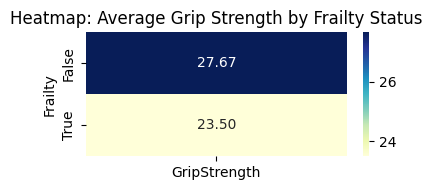


Heatmap saved to results/frailty_analysis/heatmap.png


In [53]:
# Stage III: Data Analysis
# For example, compare average grip strength for frail vs. non-frail participants

analysis = df.groupby('Frailty')['GripStrength'].mean().reset_index()
print("Average Grip Strength by Frailty Status:")
print(analysis)

# Save a simple text summary of the analysis
os.makedirs("results/frailty_analysis", exist_ok=True)
with open("results/frailty_analysis/summary.txt", "w") as f:
    f.write("Average Grip Strength by Frailty Status:\n")
    f.write(analysis.to_string(index=False))
print("Analysis summary saved.\n")

# Create a heatmap using the analysis results
# Pivot the DataFrame so that "Frailty" becomes the index
heatmap_data = analysis.set_index("Frailty")

plt.figure(figsize=(4, 2))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap: Average Grip Strength by Frailty Status")
plt.tight_layout()

# Save the heatmap to a file and display it
heatmap_filepath = "results/frailty_analysis/heatmap.png"
plt.savefig(heatmap_filepath)
plt.show()
print(f"\nHeatmap saved to {heatmap_filepath}")
